## M. Amintoosi
## کاوش الگوهای پرتکرار
استخراج قوانین انجمنی

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly&response_type=code

Enter your authorization code:
4/1AY0e-g6mcid9vc4ykdXTRe5MoNLwDqMyRgQez--Pjm5bJ0DFP3ZwQgcJOaA


In [2]:
cd /content/drive/My Drive/colabs/CoWork/Kohan

/content/drive/My Drive/colabs/CoWork/Kohan


In [ ]:
!pip3 install Orange3-Associate
!pip install pyvis

In [2]:
import pandas as pd
import numpy as np
from orangecontrib.associate.fpgrowth import *
from itertools import tee
from tqdm import tqdm

# df = pd.read_excel(r'matrix20.xlsx') 
df = pd.read_excel(r'../data/403.xlsx', engine="openpyxl") 
# print (df)
# metabolitNames = df.head(0).to_string()
plantNames = list(df.head(0))

In [3]:
numpy_matrix = df.values
d =  numpy_matrix.transpose()
T = [[str(i)[3:] for i in row ] for row in d]
T = [[int(i) for i in row if i != ''] for row in T]
# T[0][:20]

In [4]:
minFreq = 10
itemsets = frequent_itemsets(T, minFreq)
freqIS_list = list(itemsets)
n_freqIS = len(freqIS_list)
print(n_freqIS)

680


In [5]:
itemSetNo = [None] * n_freqIS
freqIS = iter(freqIS_list)
for i,item in enumerate(freqIS):
    itemSetNo[i] = len(item[0])

fileName = "results/"+str(minFreq)+"_common_metabolite_set_number_order"+".txt"
output = open(fileName, 'w')
n = 1
prevSetNo = -1
with tqdm(total=n_freqIS) as progress_bar:
  for k in range(max(itemSetNo)):
      nSetNo = k+1
      freqIS = iter(freqIS_list)
      for i,item in enumerate(freqIS):
          set_i = item[0]
          thisSetNo = len(set_i)
          if(thisSetNo==nSetNo and prevSetNo != thisSetNo):
              output.write("======= sets with %d elements =======\n"% nSetNo)
          if(thisSetNo==nSetNo):
              items = [x for x in set_i]
              output.write("%d %s %d\n" % (n,items,item[1]))
              n = n+1
              prevSetNo = thisSetNo
              progress_bar.update(1) # update progress
output.close() 

100%|██████████| 680/680 [00:00<00:00, 106371.04it/s]


In [10]:
# len(freqIS)
# تعداد فایل از این کمتر است به این دلیل که یک دانه‌ای ها را نمایش نمی دهیم

In [11]:
itemFreq = [None] * n_freqIS
freqIS = iter(freqIS_list)
for i,item in enumerate(freqIS):
    itemFreq[i] = item[1]

fileName = "results/"+str(minFreq)+"_common_metabolite_freq_number_order"+".txt"
output = open(fileName, 'w')
n = 1
prevFreq = -1
with tqdm(total=n_freqIS) as progress_bar:
  for k in range(max(itemFreq)):
      nFreq = k+1
      freqIS = iter(freqIS_list)
      for i,item in enumerate(freqIS):
          set_i = item[0]
          thisFreq = item[1]
          if(thisFreq==nFreq and prevFreq != thisFreq):
              output.write("======= sets with frequency=%d =======\n"% nFreq)
          if(thisFreq==nFreq):
              items = [x for x in set_i]
              output.write("%d %s\n" % (n,items))
              n = n+1
              prevFreq = thisFreq
              progress_bar.update(1) # update progress

output.close() 

100%|██████████| 680/680 [00:00<00:00, 48763.47it/s]


In [6]:
corpus = [None] * len(T)
for i in range(len(T)):
    listToStr = ' '.join([str(elem) for elem in T[i]]) 
    corpus[i] = listToStr

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern = r"(?u)\b\w+\b")
X = vectorizer.fit_transform(corpus)
print(X.shape)
print(X.toarray())

(403, 7416)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [8]:
bow = X.toarray()
print(bow[0] & bow[2])
print(sum(bow[0] & bow[2]))

[0 0 0 ... 0 0 0]
1


In [9]:
featureNames = vectorizer.get_feature_names()
type(featureNames)
featureNames[:5]

['1', '10', '100', '1000', '10004']

In [10]:
# list(items)
T[:5]

[[1036, 2647, 5548, 5872, 8210, 8817, 13297, 13867, 13974, 14320, 46784],
 [2647, 5548, 8817],
 [1411, 2647, 6798, 30222, 30754, 38195],
 [1151, 1411, 2728, 2775, 6798],
 [615,
  619,
  1174,
  1189,
  1273,
  1345,
  1367,
  1555,
  2074,
  2724,
  3040,
  3114,
  3205,
  3674,
  3817,
  3840,
  4607,
  4705,
  4712,
  5413,
  11756,
  20476,
  20821,
  21325,
  34392,
  41430]]

In [19]:
# commItems_idx = [featureNames.index(str(x)) for x in list(items)]
# print(commItems_idx)

In [20]:
itemFreq = [None] * n_freqIS
freqIS = iter(freqIS_list)
for i,item in enumerate(freqIS):
    itemFreq[i] = item[1]

nCol = len(T)    
G = np.zeros([nCol,nCol])  
    
fileName = "results/"+str(minFreq)+"_common_plantNo_freq"+".txt"
output = open(fileName, 'w')
n = 1
prevFreq = -1
# حلقه زیر نیاز به بازنویسی دارد. فقط روی فرکانسهای موجود باید حرکت بشه نه از اول شروع کنیم و یکی یکی ...
# unique(itemFreq)
with tqdm(total=n_freqIS) as progress_bar:
  for k in range(max(itemFreq)):
      nFreq = k+1
      freqIS = iter(freqIS_list)
      for i,item in enumerate(freqIS):
          set_i = item[0]
          thisFreq = item[1]
          if(thisFreq==nFreq and prevFreq != thisFreq):
              output.write("======= sets with frequency=%d =======\n"% nFreq)
          if(thisFreq==nFreq):
              items = [x for x in set_i]
              commItems_idx = [featureNames.index(str(x)) for x in list(items)]
  #             print(commItems_idx)
              w = len(commItems_idx)

              metabolits_list = [featureNames[int(ii)] for ii in commItems_idx]
              output.write("%d %s --" % (n,metabolits_list))
              
              vec = np.zeros((len(bow[0]),), dtype=int)
              vec[commItems_idx] = 1;
              commItems = []
              for j in range(len(bow)):
                  row = bow[j]
                  if sum(row&vec)== w:
                      commItems.append(j)
                      
  # #          commItems = [rowIdx for row in bow if sum(row&vec)!=0]
              output.write(" %s \n" % (commItems))
              for ii in range(len(commItems)):
                  for jj in range(ii):
                      src = commItems[ii]
                      dst = commItems[jj]
                      G[src,dst] += 1
  #                     G[jj,ii] += w
      
  #             col_list = [metabolitNames[int(ii)] for ii in commItems]
  #             output.write(" %s \n" % (col_list))
          
              n = n+1
              prevFreq = thisFreq
              progress_bar.update(1) # update progress

output.close() 

100%|██████████| 680/680 [06:06<00:00,  1.85it/s]


TypeError: ignored

In [21]:
G_fileName = "results/"+str(minFreq)+"_G"+".npy"
with open(G_fileName, 'wb') as f:
  np.save(f,G)
  np.save(f,featureNames)
  np.save(f,plantNames)
  np.save(f,bow)


In [22]:
itemFreq = [None] * n_freqIS
freqIS = iter(freqIS_list)
for i,item in enumerate(freqIS):
    itemFreq[i] = item[1]

nCol = len(T)    
# G = np.zeros([nCol,nCol])  
    
fileName = "results/"+str(minFreq)+"_common_plantName_freq"+".txt"
output = open(fileName, 'w')
n = 1
prevFreq = -1
with tqdm(total=n_freqIS) as progress_bar:
  for k in range(max(itemFreq)):
      nFreq = k+1
      freqIS = iter(freqIS_list)
      for i,item in enumerate(freqIS):
          set_i = item[0]
          thisFreq = item[1]
          if(thisFreq==nFreq and prevFreq != thisFreq):
              output.write("======= sets with frequency=%d =======\n"% nFreq)
          if(thisFreq==nFreq):
              items = [x for x in set_i]
              commItems_idx = [featureNames.index(str(x)) for x in list(items)]
  #             print(commItems_idx)
              w = len(commItems_idx)

              metabolits_list = [featureNames[int(ii)] for ii in commItems_idx]
              output.write("%d %s --" % (n,metabolits_list))
              
              vec = np.zeros((len(bow[0]),), dtype=int)
              vec[commItems_idx] = 1;
              commItems = []
              for j in range(len(bow)):
                  row = bow[j]
                  if sum(row&vec)== w:
                      commItems.append(plantNames[j])
                      
  # #          commItems = [rowIdx for row in bow if sum(row&vec)!=0]
              output.write(" %s \n" % (commItems))
          
              n = n+1
              prevFreq = thisFreq
              progress_bar.update(1) # update progress

output.close() 

100%|██████████| 680/680 [05:58<00:00,  1.90it/s]


In [12]:
# ایجاد گراف برای نمایش
itemFreq = [None] * n_freqIS
freqIS = iter(freqIS_list)
for i,item in enumerate(freqIS):
    itemFreq[i] = item[1]

nCol = len(T)    
G = np.zeros([nCol,nCol])  
MIN_FREQ = 10
prev_minFreq = minFreq
minFreq = MIN_FREQ
with tqdm(total=n_freqIS) as progress_bar:
    freqIS = iter(freqIS_list)
    for i,item in enumerate(freqIS):
        set_i = item[0]
        thisFreq = item[1]
        print(item)
        break
        if(thisFreq >= minFreq):
            items = [x for x in set_i]
            commItems_idx = [featureNames.index(str(x)) for x in list(items)]
            w = len(commItems_idx)
            vec = np.zeros((len(bow[0]),), dtype=int)
            vec[commItems_idx] = 1;
            commItems = []
            for j in range(len(bow)):
                row = bow[j]
                if sum(row&vec)== w:
                    commItems.append(j)
            # print(commItems)
            for ii in range(len(commItems)):
                for jj in range(len(commItems)):#range(ii):
                  if(ii != jj):
                    src = commItems[ii]
                    dst = commItems[jj]
                    # G[src,dst] += w
                    G[src,dst] += 1
        progress_bar.update(1) # update progress

minFreq = prev_minFreq

  0%|          | 0/680 [00:00<?, ?it/s]

(frozenset({3672}), 61)


In [14]:
print(len(featureNames))
print(len(T))
print(featureNames[0])
print(T[0])
nPl

7416
403
1
[1036, 2647, 5548, 5872, 8210, 8817, 13297, 13867, 13974, 14320, 46784]


In [173]:
from pyvis.network import Network
import pandas as pd

got_net = Network(height="750px", width="100%", bgcolor="#222222", font_color="white")

# set the physics layout of the network
got_net.barnes_hut()
with tqdm(total=len(G)*(len(G)+1)/2) as progress_bar:
  for ii in range(len(G)):
      for jj in range(ii):
          w = G[ii,jj]
          progress_bar.update(1) # update progress
          if w!=0:
              # src = str(ii)
              # dst = str(jj)
              # got_net.add_node(src, src, title=src)
              # got_net.add_node(dst, dst, title=dst)
              src = plantNames[ii]
              dst = plantNames[jj]
              got_net.add_node(src, src, title=plantNames[ii])
              got_net.add_node(dst, dst, title=plantNames[jj])
              got_net.add_edge(src, dst, value=w)

100%|█████████▉| 81003/81406.0 [00:05<00:00, 15148.77it/s]


In [174]:
degreeG = G.sum(axis=0)
# degreeG

In [175]:
neighbor_map = got_net.get_adj_list()
# add neighbor data to node hover data
for node in got_net.nodes:
    node["title"] += "<br>" + str(len(neighbor_map[node["id"]]))+ " Neighbors:<br>" + "<br>".join(neighbor_map[node["id"]])
    node["value"] = len(neighbor_map[node["id"]])

In [177]:
got_net.show("results/"+str(minFreq)+"_metabolGraph_w1.html")

In [ ]:
import seaborn as sns
sns.heatmap(G, annot=True)

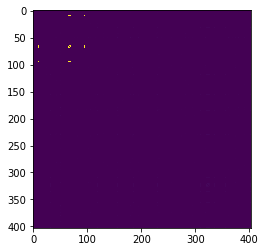

In [178]:
%matplotlib inline 
from matplotlib import pyplot as plt
plt.imshow(G, interpolation='nearest')
plt.show()

In [179]:
nPlants = np.sum(degreeG != 0)
print(nPlants)
sorted_plants = np.sort(degreeG)[::-1]
sorted_plants_idx = np.argsort(degreeG)[::-1] # Descending order
# print(degreeG[sorted_plants_idx[0]])
bestPlants = sorted_plants_idx[:np.min([nPlants,100])]
print(bestPlants)
# print(plantNames[bestPlants])
bestPlantNames = [plantNames[x] for x in bestPlants]
# bestPlants_fileName = "results/"+str(minFreq)+"_bestPlants"+".npy"
# with open(bestPlants_fileName, 'wb') as f:
#   np.save(f,bestPlantNames)


265
[ 10  68 197  67  69 269 107  65  66  95  50  53 156 279 230 208 105  40
 245 201  49 335 320 321 322 324 312 402 345 119 310 185 151  32 355  70
 314 336 327 326 309 114 316 205 358 179 195 180 290 183 390 379 347 273
 361 103 281 136 137 374 377 194  82 362 106  43 275 318   4 304 295 210
 242 115 368 294  29 168 102 287 233 203 401 158  88  35  99  31 363 237
 298 299 153  24 130  14 308 228 372 160]


In [181]:
# MIN_FREQ = 40
# prev_minFreq = minFreq
# minFreq = MIN_FREQ

# subG = G[bestPlants,:]
# subG = subG[:,bestPlants]
best_net = Network(height="750px", width="100%", bgcolor="white", font_color="black")

# set the physics layout of the network
best_net.barnes_hut()
with tqdm(total=len(bestPlants)*(len(bestPlants)-1)/2) as progress_bar:
  for ii in range(len(G)):
    if(ii in bestPlants):
      for jj in range(ii):
        if(jj in bestPlants):
          w = G[ii,jj]
          progress_bar.update(1) # update progress
          if w!=0:
              src = plantNames[ii]
              dst = plantNames[jj]
              best_net.add_node(src, src, title=plantNames[ii])
              best_net.add_node(dst, dst, title=plantNames[jj])
              best_net.add_edge(src, dst, value=w)

neighbor_map = best_net.get_adj_list()
# add neighbor data to node hover data
for node in best_net.nodes:
    node["title"] += "<br>" + str(len(neighbor_map[node["id"]]))+ " Neighbors:<br>" + "<br>".join(neighbor_map[node["id"]])
    node["value"] = len(neighbor_map[node["id"]])     

best_net.show("results/bestPlants_min_freq_"+str(MIN_FREQ)+".html")      


100%|██████████| 4950/4950.0 [00:00<00:00, 7597.79it/s]


In [151]:
df = pd.read_excel(r'data/100best.xlsx',header=0) 
plantNames_Cytohubba = df['plantName']

In [183]:
plantNames_FIS = bestPlantNames[:]

In [185]:
intersectPlants = set(plantNames_FIS) & set(plantNames_Cytohubba)
intersectPlants

{'Arabidopsis thaliana',
 'Ardisia colorata',
 'Artemisia annua',
 'Camellia sinensis',
 'Citrus unshiu',
 'Crataegus pinnatifida',
 'Cucumis sativus',
 'Hibiscus taiwanensis',
 'Perilla frutescens',
 'Phellodendron amurense',
 'Plantago major',
 'Punica granatum',
 'Salvia officinalis',
 'Sophora japonica',
 'Theobroma cacao',
 'Trifolium repens',
 'Ziziphus jujuba'}

In [186]:
import xlsxwriter 
workbook = xlsxwriter.Workbook("results/bestPlants_min_freq_"+str(MIN_FREQ)+".xlsx") 
worksheet = workbook.add_worksheet() 
row = 0
column = 0
for idx,item,freq in zip(bestPlants,bestPlantNames,sorted_plants) : 
    # write operation perform 
    worksheet.write(row, 0, idx) 
    worksheet.write(row, 1, item) 
    worksheet.write(row, 2, freq) 
    # incrementing the value of row by one 
    # with each iteratons. 
    row += 1
      
worksheet = workbook.add_worksheet() 
row = 0
column = 0
for item in intersectPlants: 
    worksheet.write(row, 0, item) 
    row += 1

workbook.close() 